In [18]:
!pwd

/Users/davidcraig/code/antoninolm/climate_change_project/climate_change_project/notebooks


In [9]:
import os
import requests
import gzip
import shutil

# DOWNLOADING ALL THE 1950-2023 AND 2024-2025 FILES

In [12]:
##Refactored to include the 20204-2025 files

# Create folder
os.makedirs("all_weather_files", exist_ok=True)

# Define periods to download
periods = [
    ("2025", "latest-2024-2025"),    # 2024–2025 files
    ("2023", "previous-1950-2023")   # 1950–2023 files
]

# Track if there was any problem
problem_occurred = False

# Loop through periods and departments
for year_suffix, url_suffix in periods:
    for dep in range(1, 96):
        dep_code = str(dep).zfill(2)

        url = f"https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_{dep_code}_{url_suffix}_RR-T-Vent.csv.gz"
        
        gz_path = f"all_weather_files/Q_{dep_code}_{year_suffix}.csv.gz"
        csv_path = f"all_weather_files/Q_{dep_code}_{year_suffix}.csv"

        try:
            print(f"📥 Downloading {gz_path}...")
            response = requests.get(url, timeout=60)

            if response.status_code == 200:
                with open(gz_path, "wb") as f:
                    f.write(response.content)
                print(f"✅ Saved {gz_path}")

                print(f"🛠️ Unzipping {gz_path}...")
                with gzip.open(gz_path, 'rb') as f_in:
                    with open(csv_path, 'wb') as f_out:
                        shutil.copyfileobj(f_in, f_out)
                print(f"✅ Unzipped to {csv_path}")

            else:
                print(f"⚠️ Skipping {dep_code} ({year_suffix}): HTTP {response.status_code}")
                problem_occurred = True

        except Exception as e:
            print(f"❌ Problem with {dep_code} ({year_suffix}): {e}")
            problem_occurred = True

# --- FINAL SUCCESS MESSAGE ---
if not problem_occurred:
    print("\n🎉✅ All files downloaded and extracted successfully!")
else:
    print("\n⚠️ Some files were skipped or had issues. Check logs above.")

📥 Downloading all_weather_files/Q_01_2025.csv.gz...
✅ Saved all_weather_files/Q_01_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_01_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_01_2025.csv
📥 Downloading all_weather_files/Q_02_2025.csv.gz...
✅ Saved all_weather_files/Q_02_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_02_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_02_2025.csv
📥 Downloading all_weather_files/Q_03_2025.csv.gz...
✅ Saved all_weather_files/Q_03_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_03_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_03_2025.csv
📥 Downloading all_weather_files/Q_04_2025.csv.gz...
✅ Saved all_weather_files/Q_04_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_04_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_04_2025.csv
📥 Downloading all_weather_files/Q_05_2025.csv.gz...
✅ Saved all_weather_files/Q_05_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_05_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_05_2025.csv
📥 Downloading all_weather_files/Q_06_202

✅ Saved all_weather_files/Q_44_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_44_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_44_2025.csv
📥 Downloading all_weather_files/Q_45_2025.csv.gz...
✅ Saved all_weather_files/Q_45_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_45_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_45_2025.csv
📥 Downloading all_weather_files/Q_46_2025.csv.gz...
✅ Saved all_weather_files/Q_46_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_46_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_46_2025.csv
📥 Downloading all_weather_files/Q_47_2025.csv.gz...
✅ Saved all_weather_files/Q_47_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_47_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_47_2025.csv
📥 Downloading all_weather_files/Q_48_2025.csv.gz...
✅ Saved all_weather_files/Q_48_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_48_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_48_2025.csv
📥 Downloading all_weather_files/Q_49_2025.csv.gz...
✅ Saved all_weather_files/Q_49_2025.csv.

✅ Saved all_weather_files/Q_87_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_87_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_87_2025.csv
📥 Downloading all_weather_files/Q_88_2025.csv.gz...
✅ Saved all_weather_files/Q_88_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_88_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_88_2025.csv
📥 Downloading all_weather_files/Q_89_2025.csv.gz...
✅ Saved all_weather_files/Q_89_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_89_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_89_2025.csv
📥 Downloading all_weather_files/Q_90_2025.csv.gz...
✅ Saved all_weather_files/Q_90_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_90_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_90_2025.csv
📥 Downloading all_weather_files/Q_91_2025.csv.gz...
✅ Saved all_weather_files/Q_91_2025.csv.gz
🛠️ Unzipping all_weather_files/Q_91_2025.csv.gz...
✅ Unzipped to all_weather_files/Q_91_2025.csv
📥 Downloading all_weather_files/Q_92_2025.csv.gz...
✅ Saved all_weather_files/Q_92_2025.csv.

✅ Saved all_weather_files/Q_35_2023.csv.gz
🛠️ Unzipping all_weather_files/Q_35_2023.csv.gz...
✅ Unzipped to all_weather_files/Q_35_2023.csv
📥 Downloading all_weather_files/Q_36_2023.csv.gz...
✅ Saved all_weather_files/Q_36_2023.csv.gz
🛠️ Unzipping all_weather_files/Q_36_2023.csv.gz...
✅ Unzipped to all_weather_files/Q_36_2023.csv
📥 Downloading all_weather_files/Q_37_2023.csv.gz...
✅ Saved all_weather_files/Q_37_2023.csv.gz
🛠️ Unzipping all_weather_files/Q_37_2023.csv.gz...
✅ Unzipped to all_weather_files/Q_37_2023.csv
📥 Downloading all_weather_files/Q_38_2023.csv.gz...
✅ Saved all_weather_files/Q_38_2023.csv.gz
🛠️ Unzipping all_weather_files/Q_38_2023.csv.gz...
✅ Unzipped to all_weather_files/Q_38_2023.csv
📥 Downloading all_weather_files/Q_39_2023.csv.gz...
✅ Saved all_weather_files/Q_39_2023.csv.gz
🛠️ Unzipping all_weather_files/Q_39_2023.csv.gz...
✅ Unzipped to all_weather_files/Q_39_2023.csv
📥 Downloading all_weather_files/Q_40_2023.csv.gz...
✅ Saved all_weather_files/Q_40_2023.csv.

✅ Saved all_weather_files/Q_78_2023.csv.gz
🛠️ Unzipping all_weather_files/Q_78_2023.csv.gz...
✅ Unzipped to all_weather_files/Q_78_2023.csv
📥 Downloading all_weather_files/Q_79_2023.csv.gz...
✅ Saved all_weather_files/Q_79_2023.csv.gz
🛠️ Unzipping all_weather_files/Q_79_2023.csv.gz...
✅ Unzipped to all_weather_files/Q_79_2023.csv
📥 Downloading all_weather_files/Q_80_2023.csv.gz...
✅ Saved all_weather_files/Q_80_2023.csv.gz
🛠️ Unzipping all_weather_files/Q_80_2023.csv.gz...
✅ Unzipped to all_weather_files/Q_80_2023.csv
📥 Downloading all_weather_files/Q_81_2023.csv.gz...
✅ Saved all_weather_files/Q_81_2023.csv.gz
🛠️ Unzipping all_weather_files/Q_81_2023.csv.gz...
✅ Unzipped to all_weather_files/Q_81_2023.csv
📥 Downloading all_weather_files/Q_82_2023.csv.gz...
✅ Saved all_weather_files/Q_82_2023.csv.gz
🛠️ Unzipping all_weather_files/Q_82_2023.csv.gz...
✅ Unzipped to all_weather_files/Q_82_2023.csv
📥 Downloading all_weather_files/Q_83_2023.csv.gz...
✅ Saved all_weather_files/Q_83_2023.csv.

In [15]:
import pandas as pd

df = pd.read_csv("all_weather_files/Q_01_2025.csv")
print(df.columns)
print(df.head())

Index(['NUM_POSTE;NOM_USUEL;LAT;LON;ALTI;AAAAMMJJ;RR;QRR;TN;QTN;HTN;QHTN;TX;QTX;HTX;QHTX;TM;QTM;TNTXM;QTNTXM;TAMPLI;QTAMPLI;TNSOL;QTNSOL;TN50;QTN50;DG;QDG;FFM;QFFM;FF2M;QFF2M;FXY;QFXY;DXY;QDXY;HXY;QHXY;FXI;QFXI;DXI;QDXI;HXI;QHXI;FXI2;QFXI2;DXI2;QDXI2;HXI2;QHXI2;FXI3S;QFXI3S;DXI3S;QDXI3S;HXI3S;QHXI3S;DRR;QDRR'], dtype='object')
  NUM_POSTE;NOM_USUEL;LAT;LON;ALTI;AAAAMMJJ;RR;QRR;TN;QTN;HTN;QHTN;TX;QTX;HTX;QHTX;TM;QTM;TNTXM;QTNTXM;TAMPLI;QTAMPLI;TNSOL;QTNSOL;TN50;QTN50;DG;QDG;FFM;QFFM;FF2M;QFF2M;FXY;QFXY;DXY;QDXY;HXY;QHXY;FXI;QFXI;DXI;QDXI;HXI;QHXI;FXI2;QFXI2;DXI2;QDXI2;HXI2;QHXI2;FXI3S;QFXI3S;DXI3S;QDXI3S;HXI3S;QHXI3S;DRR;QDRR
0  01014002;ARBENT;46.278167;5.669000;534;2024010...                                                                                                                                                                                                                                                           
1  01014002;ARBENT;46.278167;5.669000;534;2024010...           

In [17]:
# Path to folder with all .csv weather files
data_folder = "all_weather_files"

# Columns to load
columns_to_use = ['AAAAMMJJ', 'NOM_USUEL', 'LAT', 'LON', 'TM', 'TX', 'TN', 'RR', 'FFM']

# Store all processed DataFrames
all_dfs = []

for file in os.listdir(data_folder):
    if file.endswith(".csv") and not file.endswith(".csv.gz"):
        file_path = os.path.join(data_folder, file)
        print(f"Processing {file}...")

        try:
            # Extract department code from filename (e.g., Q_01.csv → 01)
            dep_code = file.split("_")[1].split(".")[0]

            # Load with semicolon delimiter
            df = pd.read_csv(file_path, sep=';', usecols=columns_to_use)

            # Convert AAAAMMJJ to proper date
            df.rename(columns={'AAAAMMJJ': 'DATE'}, inplace=True)
            df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d', errors='coerce')

            # Add DEP column
            df['DEP'] = dep_code

            # Drop rows with missing or malformed values
            df.dropna(subset=['DATE', 'NOM_USUEL', 'TM', 'TX', 'TN', 'RR', 'FFM'], inplace=True)

            all_dfs.append(df)

        except Exception as e:
            print(f"⚠️ Error processing {file}: {e}")

# Combine all into one DataFrame
weather_df = pd.concat(all_dfs, ignore_index=True)

# Preview
print(f"\n✅ Combined data from {len(all_dfs)} files")
print(f"Total rows: {len(weather_df):,}")
print(weather_df.head())

Processing Q_41_2023.csv...
Processing Q_40_2023.csv...
Processing Q_08_2023.csv...
Processing Q_09_2023.csv...
Processing Q_57_2025.csv...
Processing Q_56_2025.csv...
Processing Q_20_2025.csv...
Processing Q_21_2025.csv...
Processing Q_36_2023.csv...
Processing Q_37_2023.csv...
Processing Q_69_2025.csv...
Processing Q_68_2025.csv...
Processing Q_90_2023.csv...
Processing Q_91_2023.csv...
Processing Q_02_2023.csv...
Processing Q_03_2023.csv...
Processing Q_14_2025.csv...
Processing Q_15_2025.csv...
Processing Q_86_2025.csv...
Processing Q_87_2025.csv...
Processing Q_63_2025.csv...
Processing Q_62_2025.csv...
Processing Q_75_2023.csv...
Processing Q_74_2023.csv...
Processing Q_40_2025.csv...
Processing Q_41_2025.csv...
Processing Q_09_2025.csv...
Processing Q_08_2025.csv...
Processing Q_56_2023.csv...
Processing Q_57_2023.csv...
Processing Q_21_2023.csv...
Processing Q_20_2023.csv...
Processing Q_37_2025.csv...
Processing Q_36_2025.csv...
Processing Q_68_2023.csv...
Processing Q_69_2023

In [19]:

# Save inside project folders with relative path
output_folder = os.path.join("..", "raw_data")
os.makedirs(output_folder, exist_ok=True)

# Path to save the final full clean file
output_path = os.path.join(output_folder, "all_clean_weather.csv")

# Save
weather_df.to_csv(output_path, index=False)

# Final confirmation
print(f"\n✅ Full clean dataset saved as {output_path}")


✅ Full clean dataset saved as ../raw_data/all_clean_weather.csv


In [20]:
weather_df

,NOM_USUEL,LAT,LON,DATE,RR,TN,TX,TM,FFM,DEP
0,CHOUE,47.969167,0.912833,2006-04-01,2.6,10.2,16.6,12.0,5.6,41
1,CHOUE,47.969167,0.912833,2006-04-02,1.2,9.1,14.9,10.7,6.4,41
2,CHOUE,47.969167,0.912833,2006-04-03,0.0,6.3,14.3,9.3,3.6,41
3,CHOUE,47.969167,0.912833,2006-04-04,0.0,1.2,12.1,7.0,5.0,41
4,CHOUE,47.969167,0.912833,2006-04-05,0.0,2.5,9.1,5.0,6.1,41
...,...,...,...,...,...,...,...,...,...,...
10161137,PEYRUSSE-GRANDE,43.616667,0.222000,2025-03-30,0.0,4.1,15.8,10.1,2.8,32
10161138,PEYRUSSE-GRANDE,43.616667,0.222000,2025-03-31,0.0,6.5,17.7,12.0,2.6,32
10161139,PEYRUSSE-GRANDE,43.616667,0.222000,2025-04-01,0.0,6.9,21.4,13.4,3.8,32
10161140,PEYRUSSE-GRANDE,43.616667,0.222000,2025-04-02,2.2,6.7,16.4,11.5,3.4,32


In [22]:

df = pd.read_csv("../raw_data/all_clean_weather.csv", parse_dates=["DATE"])
df.sort_values(by=["NOM_USUEL", "DATE"], inplace=True)
df.reset_index(drop=True, inplace=True)


In [23]:

# Time-based features
df['day_of_year'] = df['DATE'].dt.dayofyear
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['weekday'] = df['DATE'].dt.weekday

# Group by station for lagging
df_grouped = df.groupby("NOM_USUEL")

# Lag features
df['TM_lag1'] = df_grouped['TM'].shift(1)
df['TM_lag365'] = df_grouped['TM'].shift(365)

# Rolling averages (7 and 30 days)
df['TM_roll7'] = df_grouped['TM'].rolling(7).mean().reset_index(level=0, drop=True)
df['TM_roll30'] = df_grouped['TM'].rolling(30).mean().reset_index(level=0, drop=True)

df['RR_roll7'] = df_grouped['RR'].rolling(7).mean().reset_index(level=0, drop=True)
df['FFM_roll7'] = df_grouped['FFM'].rolling(7).mean().reset_index(level=0, drop=True)

# Drop rows with NaNs from shifting/rolling
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [24]:
df.head()


,NOM_USUEL,LAT,LON,DATE,RR,TN,TX,TM,FFM,DEP,day_of_year,month,year,weekday,TM_lag1,TM_lag365,TM_roll7,TM_roll30,RR_roll7,FFM_roll7
0,ABAINVILLE,48.528,5.498667,2006-03-31,0.0,10.4,15.3,11.4,5.1,55,90,3,2006,4,11.3,9.7,11.071429,4.113333,5.914286,5.114286
1,ABAINVILLE,48.528,5.498667,2006-04-01,2.0,6.4,16.2,10.6,3.9,55,91,4,2006,5,11.4,9.4,11.000000,4.503333,4.200000,4.871429
2,ABAINVILLE,48.528,5.498667,2006-04-02,6.6,6.9,14.4,9.6,4.8,55,92,4,2006,6,10.6,10.6,10.214286,4.753333,4.457143,4.871429
3,ABAINVILLE,48.528,5.498667,2006-04-03,0.0,6.5,12.8,8.1,4.0,55,93,4,2006,0,9.6,11.1,9.571429,5.046667,4.114286,4.742857
4,ABAINVILLE,48.528,5.498667,2006-04-04,0.2,-1.4,12.0,5.6,2.0,55,94,4,2006,1,8.1,11.5,9.185714,5.320000,3.285714,4.357143


In [25]:
unique_stations = df['NOM_USUEL'].nunique()
print(f"🛰️ Number of unique stations: {unique_stations}")

🛰️ Number of unique stations: 1041


In [26]:
station_counts = df.groupby('NOM_USUEL')['DATE'].nunique()

In [27]:
print(station_counts.sort_values(ascending=False).head(10))  # Most complete stations
print(station_counts.sort_values().head(10))  # Least complete

NOM_USUEL
BEAUCOUZE               27122
BORDEAUX-MERIGNAC       27120
MONT-DE-MARSAN          27115
BALE-MULHOUSE           27114
LILLE-LESQUIN           27113
LYON-BRON               27110
NICE                    27109
NANCY-ESSEY             27106
CHARTRES                27104
MONTPELLIER-AEROPORT    27104
Name: DATE, dtype: int64
NOM_USUEL
LA ROCHELLE LA REPENTIE     19
AUXERRE-LES-ILES            30
VINSOBRES                   41
MONTBOUCHER-S-J             41
LUSIGNAN-INRAE              71
GRANVILLE                   71
AURAY                       93
LONGUES-SUR-MER            112
MAGNAN DAUNIAN             116
TIESTE-URAGNOUX PANGA      120
Name: DATE, dtype: int64


## DISTRIBUTION OF No. of RECORD

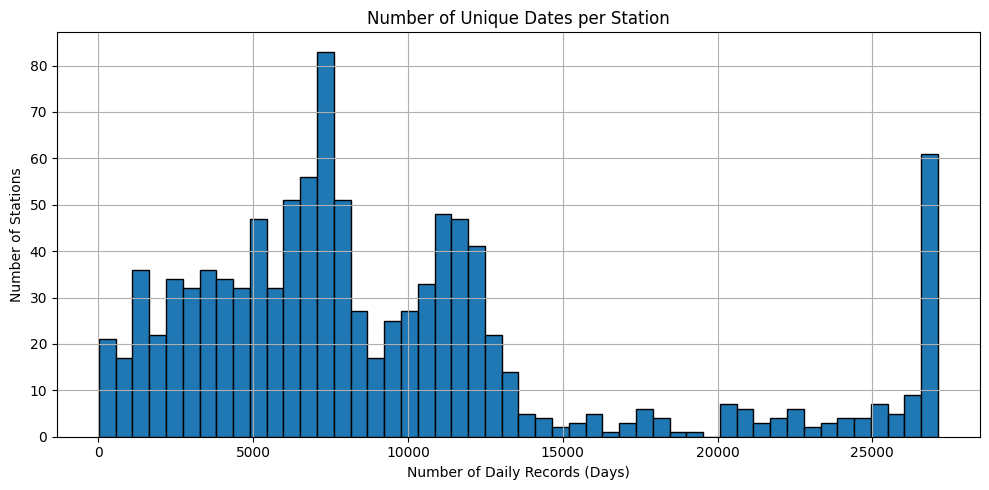

In [28]:
import matplotlib.pyplot as plt

# Count unique days per station
station_counts = df.groupby('NOM_USUEL')['DATE'].nunique()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(station_counts, bins=50, edgecolor='black')
plt.title("Number of Unique Dates per Station")
plt.xlabel("Number of Daily Records (Days)")
plt.ylabel("Number of Stations")
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
station_counts = df.groupby('NOM_USUEL')['DATE'].nunique()
top_stations = station_counts[station_counts >= 26000].index
df_top = df[df['NOM_USUEL'].isin(top_stations)].copy()

In [30]:
dep_to_region = {
    '01': 'Auvergne-Rhône-Alpes', '02': 'Hauts-de-France', '03': 'Auvergne-Rhône-Alpes',
    '04': 'Provence-Alpes-Côte d\'Azur', '05': 'Provence-Alpes-Côte d\'Azur',
    '06': 'Provence-Alpes-Côte d\'Azur', '07': 'Auvergne-Rhône-Alpes',
    '08': 'Grand Est', '09': 'Occitanie', '10': 'Grand Est', '11': 'Occitanie',
    '12': 'Occitanie', '13': 'Provence-Alpes-Côte d\'Azur', '14': 'Normandie',
    '15': 'Auvergne-Rhône-Alpes', '16': 'Nouvelle-Aquitaine', '17': 'Nouvelle-Aquitaine',
    '18': 'Centre-Val de Loire', '19': 'Nouvelle-Aquitaine', '2A': 'Corse',
    '2B': 'Corse', '21': 'Bourgogne-Franche-Comté', '22': 'Bretagne',
    '23': 'Nouvelle-Aquitaine', '24': 'Nouvelle-Aquitaine', '25': 'Bourgogne-Franche-Comté',
    '26': 'Auvergne-Rhône-Alpes', '27': 'Normandie', '28': 'Centre-Val de Loire',
    '29': 'Bretagne', '30': 'Occitanie', '31': 'Occitanie', '32': 'Occitanie',
    '33': 'Nouvelle-Aquitaine', '34': 'Occitanie', '35': 'Bretagne',
    '36': 'Centre-Val de Loire', '37': 'Centre-Val de Loire', '38': 'Auvergne-Rhône-Alpes',
    '39': 'Bourgogne-Franche-Comté', '40': 'Nouvelle-Aquitaine', '41': 'Centre-Val de Loire',
    '42': 'Auvergne-Rhône-Alpes', '43': 'Auvergne-Rhône-Alpes', '44': 'Pays de la Loire',
    '45': 'Centre-Val de Loire', '46': 'Occitanie', '47': 'Nouvelle-Aquitaine',
    '48': 'Occitanie', '49': 'Pays de la Loire', '50': 'Normandie', '51': 'Grand Est',
    '52': 'Grand Est', '53': 'Pays de la Loire', '54': 'Grand Est', '55': 'Grand Est',
    '56': 'Bretagne', '57': 'Grand Est', '58': 'Bourgogne-Franche-Comté',
    '59': 'Hauts-de-France', '60': 'Hauts-de-France', '61': 'Normandie',
    '62': 'Hauts-de-France', '63': 'Auvergne-Rhône-Alpes', '64': 'Nouvelle-Aquitaine',
    '65': 'Occitanie', '66': 'Occitanie', '67': 'Grand Est', '68': 'Grand Est',
    '69': 'Auvergne-Rhône-Alpes', '70': 'Bourgogne-Franche-Comté',
    '71': 'Bourgogne-Franche-Comté', '72': 'Pays de la Loire', '73': 'Auvergne-Rhône-Alpes',
    '74': 'Auvergne-Rhône-Alpes', '75': 'Île-de-France', '76': 'Normandie',
    '77': 'Île-de-France', '78': 'Île-de-France', '79': 'Nouvelle-Aquitaine',
    '80': 'Hauts-de-France', '81': 'Occitanie', '82': 'Occitanie',
    '83': 'Provence-Alpes-Côte d\'Azur', '84': 'Provence-Alpes-Côte d\'Azur',
    '85': 'Pays de la Loire', '86': 'Nouvelle-Aquitaine', '87': 'Nouvelle-Aquitaine',
    '88': 'Grand Est', '89': 'Bourgogne-Franche-Comté', '90': 'Bourgogne-Franche-Comté',
    '91': 'Île-de-France', '92': 'Île-de-France', '93': 'Île-de-France',
    '94': 'Île-de-France', '95': 'Île-de-France'
}

In [31]:
dep_to_region['20'] = 'Corse'

In [32]:
stations_geo = df_top.groupby('NOM_USUEL')[['LAT', 'LON', 'DEP']].first().reset_index()

In [33]:
# Ensure DEP is string-padded correctly
stations_geo['DEP'] = stations_geo['DEP'].astype(str).str.zfill(2)

# Now map to region
stations_geo['REGION'] = stations_geo['DEP'].map(dep_to_region)

In [34]:
print(stations_geo[['NOM_USUEL', 'DEP', 'REGION']].head())

         NOM_USUEL DEP                REGION
0        ABBEVILLE  80       Hauts-de-France
1  AGEN-LA GARENNE  47    Nouvelle-Aquitaine
2          AJACCIO  20                 Corse
3          ALENCON  61             Normandie
4         AMBERIEU  01  Auvergne-Rhône-Alpes


In [35]:
stations_geo

,NOM_USUEL,LAT,LON,DEP,REGION
0,ABBEVILLE,50.136000,1.834000,80,Hauts-de-France
1,AGEN-LA GARENNE,44.172167,0.594667,47,Nouvelle-Aquitaine
2,AJACCIO,41.918000,8.792667,20,Corse
3,ALENCON,48.445500,0.110167,61,Normandie
4,AMBERIEU,45.976500,5.329333,01,Auvergne-Rhône-Alpes
...,...,...,...,...,...
65,TOULON,43.114000,5.900500,83,Provence-Alpes-Côte d'Azur
66,TOULOUSE-BLAGNAC,43.621000,1.378833,31,Occitanie
67,TRAPPES,48.774333,2.009833,78,Île-de-France
68,VICHY-CHARMEIL,46.166667,3.398667,03,Auvergne-Rhône-Alpes


## SHOW TOP 60+ STATIONS WITH OVER 26000 RECORDS

In [36]:
##Colours by region plotted
import seaborn as sns
import folium

# Color by region
unique_regions = stations_geo['REGION'].dropna().unique()
region_palette = sns.color_palette("hsv", len(unique_regions)).as_hex()
region_colors = dict(zip(unique_regions, region_palette))

map_by_region = folium.Map(location=[46.5, 2.5], zoom_start=6)

for _, row in stations_geo.iterrows():
    region = row['REGION']
    color = region_colors.get(region, 'gray')

    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=4,
        color=color,
        fill=True,
        fill_opacity=0.9,
        popup=f"{row['NOM_USUEL']} ({region})"
    ).add_to(map_by_region)

map_by_region.save("map_stations_by_region.html")
print("✅ Saved map by region: map_stations_by_region.html")

✅ Saved map by region: map_stations_by_region.html


In [37]:
# Color by department
unique_deps = stations_geo['DEP'].unique()
dep_palette = sns.color_palette("tab20", len(unique_deps)).as_hex()
dep_colors = dict(zip(unique_deps, dep_palette))

map_by_department = folium.Map(location=[46.5, 2.5], zoom_start=6)

for _, row in stations_geo.iterrows():
    dep = row['DEP']
    color = dep_colors.get(dep, 'gray')

    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=4,
        color=color,
        fill=True,
        fill_opacity=0.9,
        popup=f"{row['NOM_USUEL']} (Dept {dep})"
    ).add_to(map_by_department)

map_by_department.save("map_stations_by_department.html")
print("✅ Saved map by department: map_stations_by_department.html")

✅ Saved map by department: map_stations_by_department.html


In [38]:
map_by_department

In [39]:
map_by_region

In [40]:
stations_geo.head()

,NOM_USUEL,LAT,LON,DEP,REGION
0,ABBEVILLE,50.136000,1.834000,80,Hauts-de-France
1,AGEN-LA GARENNE,44.172167,0.594667,47,Nouvelle-Aquitaine
2,AJACCIO,41.918000,8.792667,20,Corse
3,ALENCON,48.445500,0.110167,61,Normandie
4,AMBERIEU,45.976500,5.329333,01,Auvergne-Rhône-Alpes


In [41]:
df

,NOM_USUEL,LAT,LON,DATE,RR,TN,TX,TM,FFM,DEP,day_of_year,month,year,weekday,TM_lag1,TM_lag365,TM_roll7,TM_roll30,RR_roll7,FFM_roll7
0,ABAINVILLE,48.528000,5.498667,2006-03-31,0.0,10.4,15.3,11.4,5.1,55,90,3,2006,4,11.3,9.7,11.071429,4.113333,5.914286,5.114286
1,ABAINVILLE,48.528000,5.498667,2006-04-01,2.0,6.4,16.2,10.6,3.9,55,91,4,2006,5,11.4,9.4,11.000000,4.503333,4.200000,4.871429
2,ABAINVILLE,48.528000,5.498667,2006-04-02,6.6,6.9,14.4,9.6,4.8,55,92,4,2006,6,10.6,10.6,10.214286,4.753333,4.457143,4.871429
3,ABAINVILLE,48.528000,5.498667,2006-04-03,0.0,6.5,12.8,8.1,4.0,55,93,4,2006,0,9.6,11.1,9.571429,5.046667,4.114286,4.742857
4,ABAINVILLE,48.528000,5.498667,2006-04-04,0.2,-1.4,12.0,5.6,2.0,55,94,4,2006,1,8.1,11.5,9.185714,5.320000,3.285714,4.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9778540,WY-DIT,49.108167,1.830667,2025-03-30,0.2,3.5,15.6,9.7,4.6,95,89,3,2025,6,8.0,8.4,9.157143,7.740000,0.514286,3.342857
9778541,WY-DIT,49.108167,1.830667,2025-03-31,0.0,2.6,14.7,8.7,3.3,95,90,3,2025,0,9.7,9.0,8.828571,7.923333,0.514286,3.500000
9778542,WY-DIT,49.108167,1.830667,2025-04-01,0.0,3.4,15.5,9.7,5.4,95,91,4,2025,1,8.7,9.3,8.871429,8.106667,0.514286,3.785714
9778543,WY-DIT,49.108167,1.830667,2025-04-02,0.0,5.6,17.1,11.3,4.8,95,92,4,2025,2,9.7,10.1,9.085714,8.350000,0.485714,4.071429


In [42]:
df.shape

(9778545, 20)